In [ ]:
import wandb
import torch
import config
from torch.utils.data import DataLoader
from torchaudio.datasets.utils import extract_archive
from torch import nn, optim
from catalyst import dl, utils
from dataset import VCTK_092_CUSTOM, collate_fn
from again_model import AgainVC

import librosa

ModuleNotFoundError: ignored

In [ ]:
%%time 
# 6 min
extract_archive(config.ARCHIVE_PATH,'VCTK-Corpus-0.92')

In [ ]:
train_ds = VCTK_092_CUSTOM(config.DATASET_PATH, config.TRAIN_SPEAKER_IDS)
test_ds = VCTK_092_CUSTOM(config.DATASET_PATH, config.TEST_SPEAKER_IDS)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
data_t = DataLoader(train_ds, config.BATCH_SIZE, collate_fn=collate_fn, shuffle=True)
data_v = DataLoader(test_ds, config.BATCH_SIZE, collate_fn=collate_fn)

In [ ]:
again_model = AgainVC(config.ENCODER_PARAMS,config.DECODER_PARAMS,config.ACTIVATION_PARAMS)
again_model.to(device);

In [ ]:
criterion = nn.L1Loss()
optimizer = optim.Adam(again_model.parameters(), lr=config.LR)

loaders = {
    "train": data_t,
    "valid": data_v,
}

runner = dl.SupervisedRunner(
    input_key="features", output_key="logits", target_key="features", loss_key="loss"
)

# model training
runner.train(
    model=again_model,
    criterion=criterion,
    optimizer=optimizer,
    loaders=loaders,
    num_epochs=config.N_EPOCHS,
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="features", metric_key="loss",
        ),
        dl.CheckpointCallback(
            logdir="./AgainVC", loader_key="valid", metric_key="loss", minimize=True, mode='model',
        ),
    ],
    loggers={"wandb": dl.WandbLogger(project="*", name="*", entity="*",)},
    logdir="./logs",
    valid_loader="valid",
    valid_metric="loss",
    minimize_valid_metric=True,
    verbose=True,
    load_best_on_end=True,
)

wandb: Currently logged in as: chmelev (use `wandb login --relogin` to force relogin)


/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()
/usr/local/lib/python3.7/dist-packages/catalyst/core/runner.py:717: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  for k, v in self.batch_metrics.items()



train (1/20) loss: 0.5004914402961731 | loss/mean: 0.5004914402961731 | loss/std: 0.37986202799934987 | lr: 0.0005 | momentum: 0.9



valid (1/20) loss: 0.37510165572166443 | loss/mean: 0.37510165572166443 | loss/std: 0.020244279607945906 | lr: 0.0005 | momentum: 0.9
* Epoch (1/20) 



train (2/20) loss: 0.3421550989151001 | loss/mean: 0.3421550989151001 | loss/std: 0.015462903121504782 | lr: 0.0005 | momentum: 0.9



valid (2/20) loss: 0.320598840713501 | loss/mean: 0.320598840713501 | loss/std: 0.01935792347770639 | lr: 0.0005 | momentum: 0.9
* Epoch (2/20) 



train (3/20) loss: 0.3153778910636902 | loss/mean: 0.3153778910636902 | loss/std: 0.014539969731023119 | lr: 0.0005 | momentum: 0.9



valid (3/20) loss: 0.30444347858428955 | loss/mean: 0.30444347858428955 | loss/std: 0.016389457525606284 | lr: 0.0005 | momentum: 0.9
* Epoch (3/20) 



train (4/20) loss: 0.2931259870529175 | loss/mean: 0.2931259870529175 | loss/std: 0.011419585119789086 | lr: 0.0005 | momentum: 0.9



valid (4/20) loss: 0.2993561327457428 | loss/mean: 0.2993561327457428 | loss/std: 0.01592132763701787 | lr: 0.0005 | momentum: 0.9
* Epoch (4/20) 



train (5/20) loss: 0.27875760197639465 | loss/mean: 0.27875760197639465 | loss/std: 0.00974191090017039 | lr: 0.0005 | momentum: 0.9



valid (5/20) loss: 0.26910799741744995 | loss/mean: 0.26910799741744995 | loss/std: 0.01532942760452889 | lr: 0.0005 | momentum: 0.9
* Epoch (5/20) 



train (6/20) loss: 0.2685803771018982 | loss/mean: 0.2685803771018982 | loss/std: 0.008649857485069903 | lr: 0.0005 | momentum: 0.9



valid (6/20) loss: 0.26772281527519226 | loss/mean: 0.26772281527519226 | loss/std: 0.014131198510901532 | lr: 0.0005 | momentum: 0.9
* Epoch (6/20) 



train (7/20) loss: 0.2616846561431885 | loss/mean: 0.2616846561431885 | loss/std: 0.008076751807404218 | lr: 0.0005 | momentum: 0.9



valid (7/20) loss: 0.26978355646133423 | loss/mean: 0.26978355646133423 | loss/std: 0.013349834680655114 | lr: 0.0005 | momentum: 0.9
* Epoch (7/20) 



train (8/20) loss: 0.25422248244285583 | loss/mean: 0.25422248244285583 | loss/std: 0.006384525970799215 | lr: 0.0005 | momentum: 0.9



valid (8/20) loss: 0.254635751247406 | loss/mean: 0.254635751247406 | loss/std: 0.014372282916316488 | lr: 0.0005 | momentum: 0.9
* Epoch (8/20) 



train (9/20) loss: 0.24929681420326233 | loss/mean: 0.24929681420326233 | loss/std: 0.006937595172500725 | lr: 0.0005 | momentum: 0.9



valid (9/20) loss: 0.2619326710700989 | loss/mean: 0.2619326710700989 | loss/std: 0.013050210505154383 | lr: 0.0005 | momentum: 0.9
* Epoch (9/20) 



train (10/20) loss: 0.24356277287006378 | loss/mean: 0.24356277287006378 | loss/std: 0.005597607961943827 | lr: 0.0005 | momentum: 0.9



valid (10/20) loss: 0.24468380212783813 | loss/mean: 0.24468380212783813 | loss/std: 0.011436034508416695 | lr: 0.0005 | momentum: 0.9
* Epoch (10/20) 



train (11/20) loss: 0.24106882512569427 | loss/mean: 0.24106882512569427 | loss/std: 0.005299727992293764 | lr: 0.0005 | momentum: 0.9



valid (11/20) loss: 0.24177156388759613 | loss/mean: 0.24177156388759613 | loss/std: 0.011489885323353115 | lr: 0.0005 | momentum: 0.9
* Epoch (11/20) 



train (12/20) loss: 0.23726597428321838 | loss/mean: 0.23726597428321838 | loss/std: 0.004404940588976131 | lr: 0.0005 | momentum: 0.9



valid (12/20) loss: 0.2386162281036377 | loss/mean: 0.2386162281036377 | loss/std: 0.011212880750386966 | lr: 0.0005 | momentum: 0.9
* Epoch (12/20) 



train (13/20) loss: 0.23500564694404602 | loss/mean: 0.23500564694404602 | loss/std: 0.00494255158086754 | lr: 0.0005 | momentum: 0.9



valid (13/20) loss: 0.24221239984035492 | loss/mean: 0.24221239984035492 | loss/std: 0.011456149234083128 | lr: 0.0005 | momentum: 0.9
* Epoch (13/20) 



train (14/20) loss: 0.23151016235351562 | loss/mean: 0.23151016235351562 | loss/std: 0.003999162853818005 | lr: 0.0005 | momentum: 0.9



valid (14/20) loss: 0.2316799908876419 | loss/mean: 0.2316799908876419 | loss/std: 0.010810080023676647 | lr: 0.0005 | momentum: 0.9
* Epoch (14/20) 



train (15/20) loss: 0.23006606101989746 | loss/mean: 0.23006606101989746 | loss/std: 0.0043507810509317 | lr: 0.0005 | momentum: 0.9



valid (15/20) loss: 0.2395145446062088 | loss/mean: 0.2395145446062088 | loss/std: 0.010472211956475682 | lr: 0.0005 | momentum: 0.9
* Epoch (15/20) 



train (16/20) loss: 0.22795839607715607 | loss/mean: 0.22795839607715607 | loss/std: 0.004647174240672456 | lr: 0.0005 | momentum: 0.9



valid (16/20) loss: 0.23062190413475037 | loss/mean: 0.23062190413475037 | loss/std: 0.012065457126312977 | lr: 0.0005 | momentum: 0.9
* Epoch (16/20) 



train (17/20) loss: 0.22534359991550446 | loss/mean: 0.22534359991550446 | loss/std: 0.0033724820720623327 | lr: 0.0005 | momentum: 0.9



valid (17/20) loss: 0.22982335090637207 | loss/mean: 0.22982335090637207 | loss/std: 0.011213578116357736 | lr: 0.0005 | momentum: 0.9
* Epoch (17/20) 



train (18/20) loss: 0.22448593378067017 | loss/mean: 0.22448593378067017 | loss/std: 0.003858096165159745 | lr: 0.0005 | momentum: 0.9



valid (18/20) loss: 0.22678020596504211 | loss/mean: 0.22678020596504211 | loss/std: 0.010687001548779542 | lr: 0.0005 | momentum: 0.9
* Epoch (18/20) 



train (19/20) loss: 0.2218424379825592 | loss/mean: 0.2218424379825592 | loss/std: 0.0033551465293273986 | lr: 0.0005 | momentum: 0.9



valid (19/20) loss: 0.22753925621509552 | loss/mean: 0.22753925621509552 | loss/std: 0.010068394799441525 | lr: 0.0005 | momentum: 0.9
* Epoch (19/20) 



train (20/20) loss: 0.2209494560956955 | loss/mean: 0.2209494560956955 | loss/std: 0.0035039163109649818 | lr: 0.0005 | momentum: 0.9



valid (20/20) loss: 0.22560352087020874 | loss/mean: 0.22560352087020874 | loss/std: 0.00985790185050106 | lr: 0.0005 | momentum: 0.9
* Epoch (20/20) 
Top best models:
gdrive/MyDrive/VK/AgainVC/train.20.pth	0.2256


loss_batch/train,0.22118
lr_batch/train,0.0005
momentum_batch/train,0.9
loss_epoch/train,0.22095
loss/mean_epoch/train,0.22095
loss/std_epoch/train,0.0035
lr_epoch/train,0.0005
momentum_epoch/train,0.9
loss_batch/valid,0.21707
lr_batch/valid,0.0005
momentum_batch/valid,0.9


loss_batch/train,█▆▅▄▄▃▃▂▂▂▂▁▂▁▂▁▁▁▁▁
lr_batch/train,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
momentum_batch/train,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss_epoch/train,█▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
loss/mean_epoch/train,█▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
loss/std_epoch/train,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_epoch/train,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
momentum_epoch/train,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss_batch/valid,█▅▅▄▃▃▃▂▃▂▂▂▂▁▂▁▁▁▁▁
lr_batch/valid,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
momentum_batch/valid,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [ ]:
import matplotlib.pyplot as plt

/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()


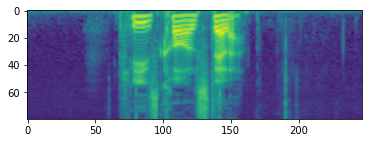

In [ ]:
plt.imshow(train_ds[0].squeeze())

/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()


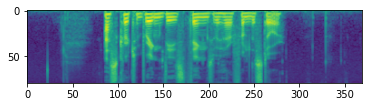

In [ ]:
plt.imshow(train_ds[1].squeeze())

/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()


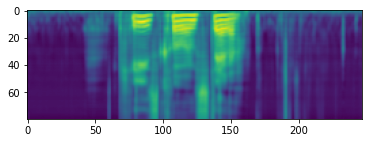

In [ ]:
plt.imshow(again_model(train_ds[0].cuda(),train_ds[1].cuda()).squeeze().cpu().detach().numpy())

/content/dataset.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mel).log10().float()


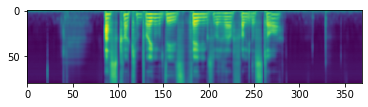

In [ ]:
plt.imshow(again_model(train_ds[1].cuda(),train_ds[0].cuda()).squeeze().cpu().detach().numpy())